# PROJECT : Investigate the Diwali Sales

### Contents
[Introduction](#Introduction) 
   -  [Background](#Background)
    
[Data Wrangling](#Data-Wrangling)
   -  [Recap](#Recap)
   -  [Data Cleaning](#Data-Cleaning)

[Exploratory Data Analysis](#Exploratory-Data-Analysis)

   -  [Users](#Users)
   -  [Age](#Age)
   -  [State](#State)
   -  [Occupation](#Occupation)

[Conclusion](#Conclusion)

### Introduction

#### Background
The Data set contains about 11,000 rows of sales info related to diwali purchases. Key columns describe the customers info including their age, marital status and geographic demographics. There are also columns informing us about the products that were bought and the categroies that they belong to.

After Initial obersevation, I decided to check for the following answers:
- Who are the top 10 buyers
- Age Group that made the most number of purchases
- Understand the Marital, Gender and Geogrophical demographics of customers

###  Data Wrangling

In [15]:
#Importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [16]:
#Importing data
df=pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [17]:
# Quick Data Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

#### Recap
- We can see that there are some columns with no data, hence we will remove them.
- Also Amount column has few enteries missing, we need to inspect them
- We will change the data type of column 'Amount' from float to int to improve quality of work.

### Data Cleaning

In [19]:
# Copying the data before we begin the cleaning
df_copy = df.copy()
df_copy.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [20]:
# dropping the empty columns
df_copy.drop(['Status','unnamed1'],axis=1,inplace=True)
df_copy.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [21]:
df_copy.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [22]:
#Inspecting the rows where Amount is null
df_copy[df_copy['Amount'].isnull()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [23]:
df_copy.shape

(11251, 13)

In [24]:
#Dropping these rows
df_copy.dropna(inplace=True)
df_copy.shape

(11239, 13)

In [25]:
df_copy['Amount']=df_copy['Amount'].astype('int')

In [26]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [27]:
df_copy.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


###  Exploratory Data Analysis

#### Users

In [28]:
df_copy.groupby(['User_ID'])

In [29]:
#Top 10 users by frequency of purchase. 
top_10=df_copy.groupby(['User_ID']).count().sort_values(by='Cust_name',ascending=False).head(10).reset_index()['User_ID']
df_copy[df_copy['User_ID'].isin(top_10)][['User_ID','Cust_name']].value_counts().reset_index()

,User_ID,Cust_name,0
0,1001680,Vasudev,24
1,1003808,Vishakha,23
2,1001941,Gopal,22
3,1004425,Indulekha,20
4,1000424,Sudevi,19
5,1002665,Champaklata,19
6,1003476,Lalita,19
7,1004682,Vishakha,19
8,1006036,Halladay,19
9,1004725,Jackson,18


In [30]:
#Total number of orders made by the person who has made the most number of purchases
df_copy[df_copy['User_ID']==1001680]['Orders'].sum()

58

In [31]:
#Top age group by frequency of purchases
df_copy.groupby(['Age Group']).count().sort_values(by='Orders',ascending=False).head(5)

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
Age Group,,,,,,,,,,,,
26-35,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541,4541
36-45,2283,2283,2283,2283,2283,2283,2283,2283,2283,2283,2283,2283
18-25,1879,1879,1879,1879,1879,1879,1879,1879,1879,1879,1879,1879
46-50,983,983,983,983,983,983,983,983,983,983,983,983
51-55,830,830,830,830,830,830,830,830,830,830,830,830


In [32]:
#Total amount sepnt by the age group
df_copy.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(1)

,Age Group,Amount
2,26-35,42613442


In [33]:
df_copy.groupby(['Gender'],as_index=True)['Amount'].sum().sort_values(ascending=False).reset_index()


,Gender,Amount
0,F,74335853
1,M,31913276


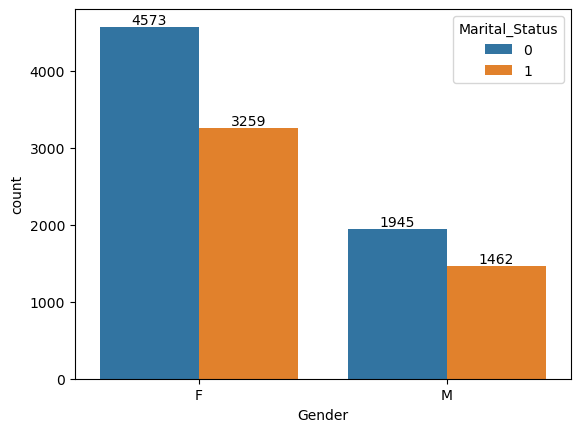

In [34]:
#To understand demographics of buyers based on gender and marital status
ax=sns.countplot(data=df_copy,x='Gender',hue='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

#### Firstly, it shows that Females buy the products in more number than males. 
#### Secondly, We can observe that in both the gender groups, unmarried buyers are more in number than married buyers. However, this difference is twice as much in females than it is in males.

#### Age

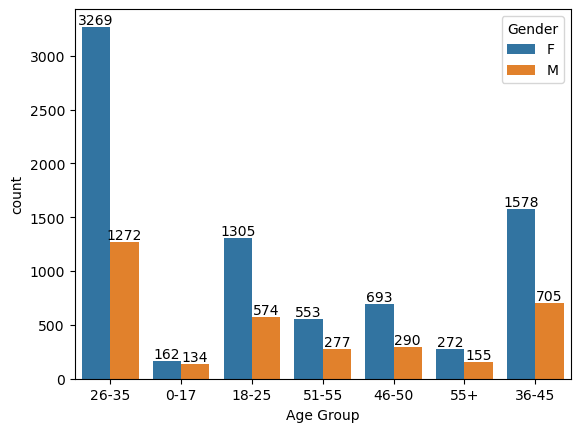

In [22]:
ax2=sns.countplot(data=df_copy,x='Age Group',hue='Gender')
for bars in ax2.containers:
    ax2.bar_label(bars)

#### It can be observed that the difference in count of male buyers and female buyers is the highest in age group 26-35 and lowest in 0-17

#### State

<Axes: xlabel='State', ylabel='Orders'>

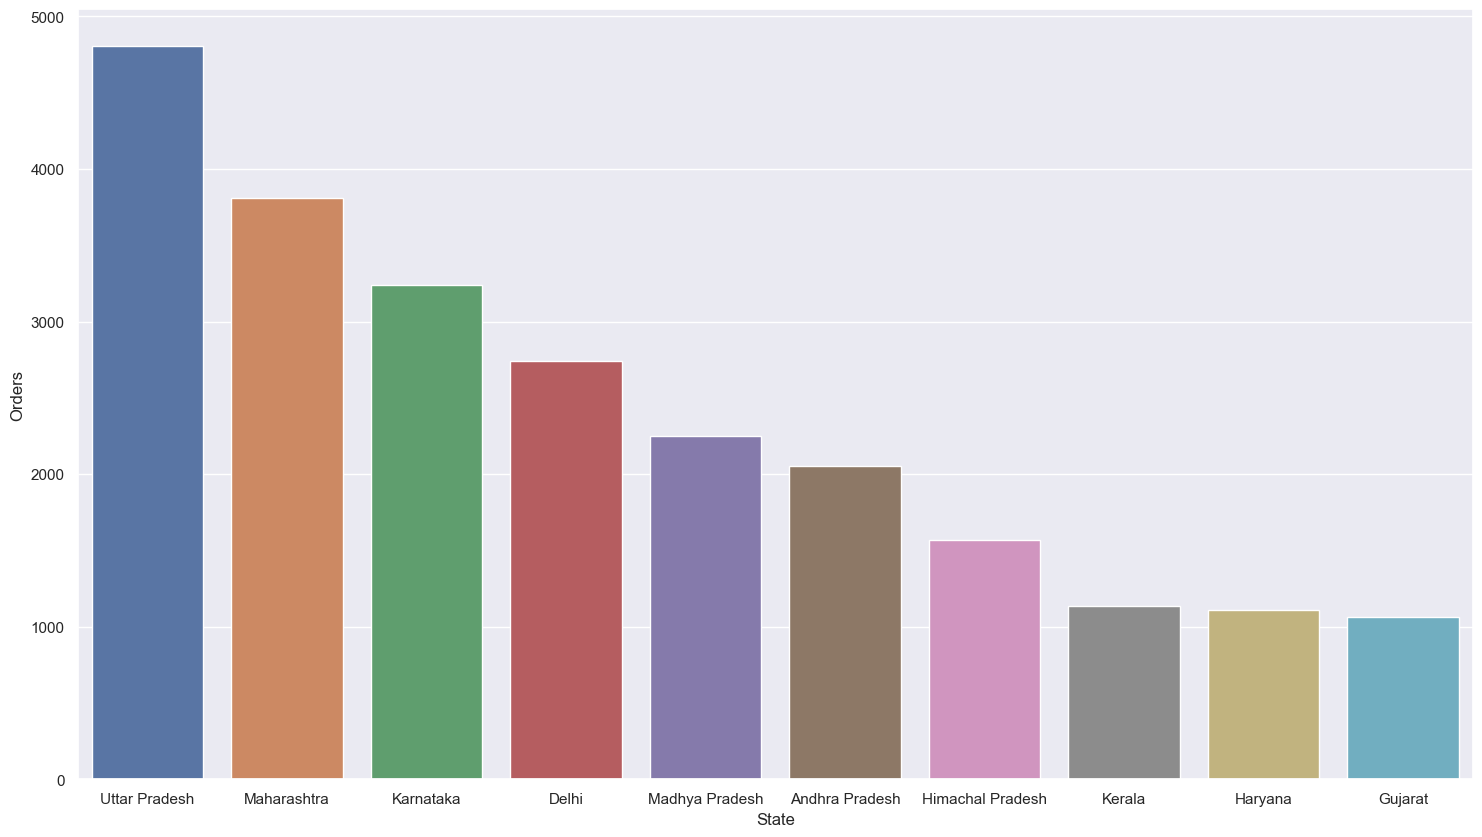

In [23]:
#Top 10 states by Total Number of Orders
state_data=df_copy.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,10)})
sns.barplot(data=state_data,x='State',y='Orders')


In [25]:
#Calculating the top Product_Category for each state and the number of orders placed for it
ord_count=df_copy.groupby(['State','Product_Category'],as_index=False).count().sort_values(by=['State','Orders'],ascending=False)
state_prod=ord_count.loc[ord_count.groupby(['State'])['Orders'].idxmax()][['State','Product_Category','Orders']]
state_prod

,State,Product_Category,Orders
4,Andhra Pradesh,Electronics & Gadgets,277
19,Bihar,Clothing & Apparel,140
37,Delhi,Footwear & Shoes,335
51,Gujarat,Clothing & Apparel,113
65,Haryana,Clothing & Apparel,123
81,Himachal Pradesh,Clothing & Apparel,240
97,Jharkhand,Clothing & Apparel,148
114,Karnataka,Footwear & Shoes,338
126,Kerala,Clothing & Apparel,182
143,Madhya Pradesh,Food,209


In [26]:
state_prod['Product_Category'].value_counts().reset_index()

,index,Product_Category
0,Clothing & Apparel,7
1,Electronics & Gadgets,4
2,Food,3
3,Footwear & Shoes,2


#### In the state with most orders, Uttar Pradesh , Food is the most popular product Category but in general, clothing and apparel is popular in most of the states.

#### Occupation

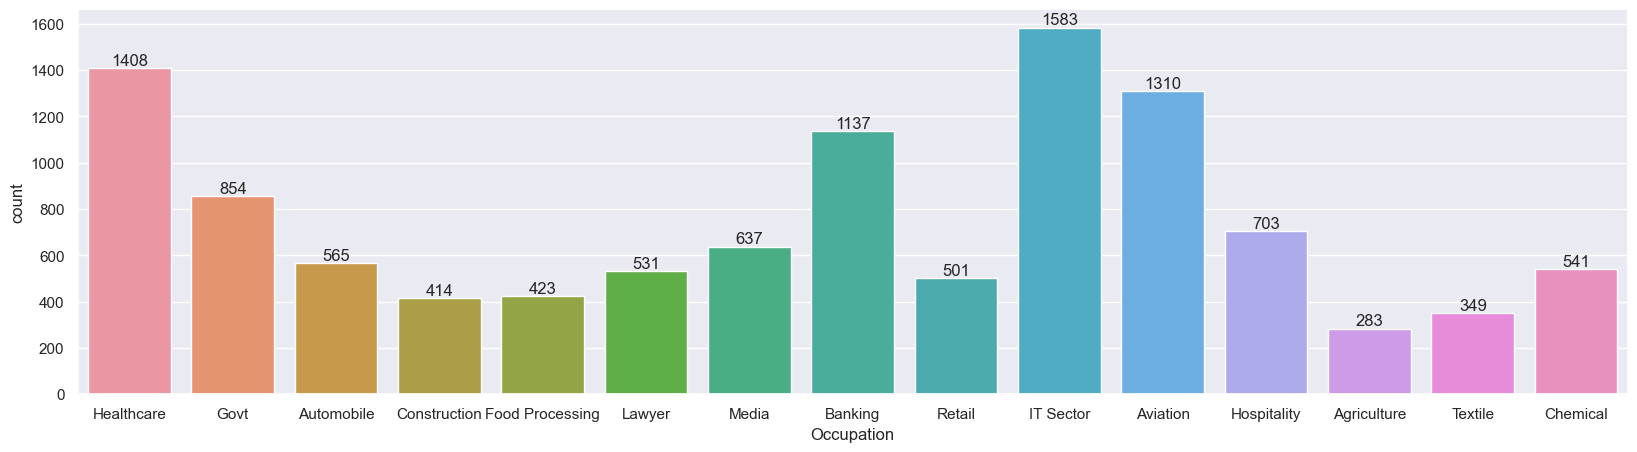

In [32]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df_copy,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

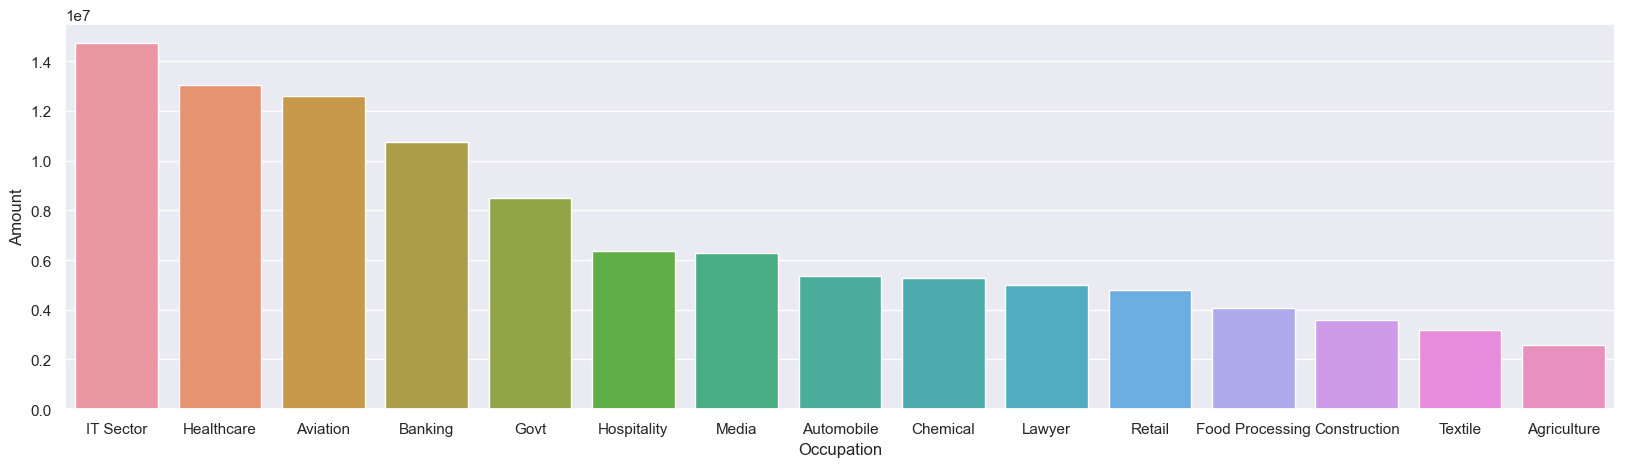

In [37]:
occ=df_copy.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=occ,x='Occupation',y='Amount')

#### We can see that IT sector dominates the purchaces by both number and amount

### Conclusion

- Most Active Age Group = 26-35
- Most Sales by Gender = Females
- State with the highest number of orders = Uttat Pradesh
- Most popular Product category statewise - Clothing & Apparel
- Most common Occupation category - IT sector
